alpha1 =  59.277773392291614
alpha2 =  87.12727283127788
error =  46.98135210761436  %


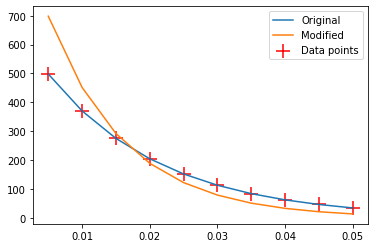

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# data hasil percobaan
d = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
i = [500, 360, 289, 205, 140, 120, 85, 65, 45, 30]
ln_i = [6.21, 5.87, 5.66, 5.32, 4.91, 4.78, 4.44, 3.81, 3.40, 1.48]

# mengubah list data menjadi numpy array
d = np.array(d) * 1e-3
i = np.array(i)
ln_i = np.array(ln_i)

# permodelan bentuk eksponensial
def f(x, a, A):
  return A*np.exp(-a * x)

# permodelan bentuk linear
def g(x, a, c):
  return c - a * x

# curve fitting
opt1, cov1 = curve_fit(f, d, i)
opt2, cov2 = curve_fit(g, d, ln_i)

# koefisien absorbsi
a1 = opt1[0]
a2 = opt2[0]
error = abs(a1-a2) / a1 * 100

y1 = f(d, a1, opt1[1])          # data points
y2 = g(d, a2, opt2[1])          # hasil dari alpha 1
y3 = f(d, a2, np.exp(opt2[1]))  # hasil dari alpha 2

# formating output
print("alpha1 = ", a1)
print("alpha2 = ", a2)
print("error = ", error, " %")

# plotting
plt.scatter(d, y1, c="r", s=200, marker="+", label="Data points")
plt.plot(d, y1, label="Original")
plt.plot(d, y3, label="Modified")
plt.legend(loc="best");